In [9]:
from src.task_3_contact_address import *
from src.utils import getFilepath
import matplotlib.pyplot as plt

In [10]:
orders_filepath = getFilepath("orders.csv")
df_2 = create_orders_with_contact_address(load_csv_to_dataframe(orders_filepath))
df_2.head()

,order_id,contact_address
0,f47ac10b-58cc-4372-a567-0e02b2c3d479,"Chicago, 12345"
1,f47ac10b-58cc-4372-a567-0e02b2c3d480,"Calcutta, UNK00"
2,f47ac10b-58cc-4372-a567-0e02b2c3d481,"Frankfurt am Oder, 3934"
3,f47ac10b-58cc-4372-a567-0e02b2c3d482,"Unknown, UNK00"
4,f47ac10b-58cc-4372-a567-0e02b2c3d483,"Unknown, UNK00"


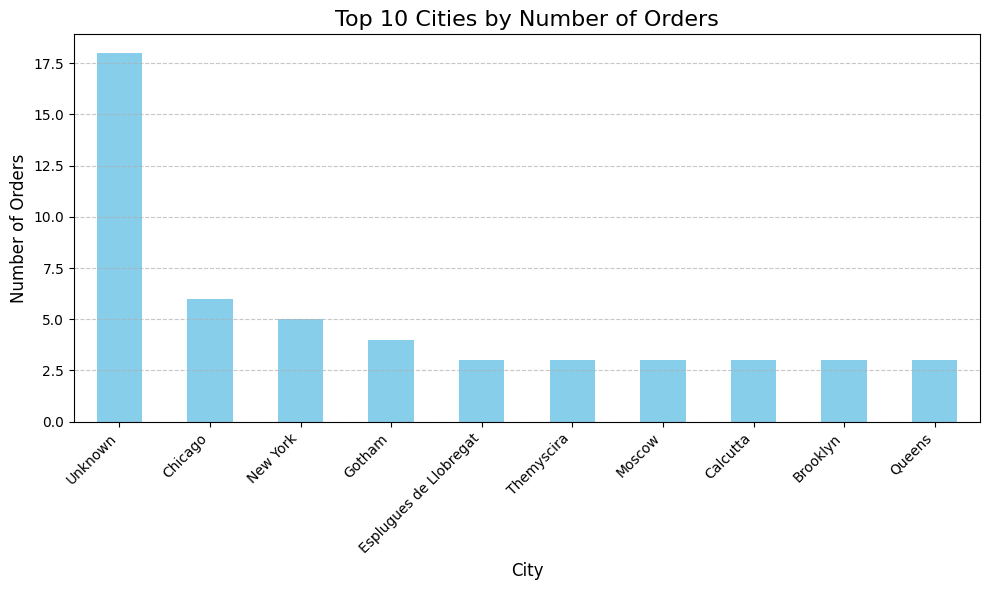

In [11]:
df_2["city"] = df_2["contact_address"].apply(lambda x: x.split(",")[0].strip())

# Count the number of orders per city
city_counts = df_2["city"].value_counts().head(10)  # Top 10 cities

# Plot
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Cities by Number of Orders", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

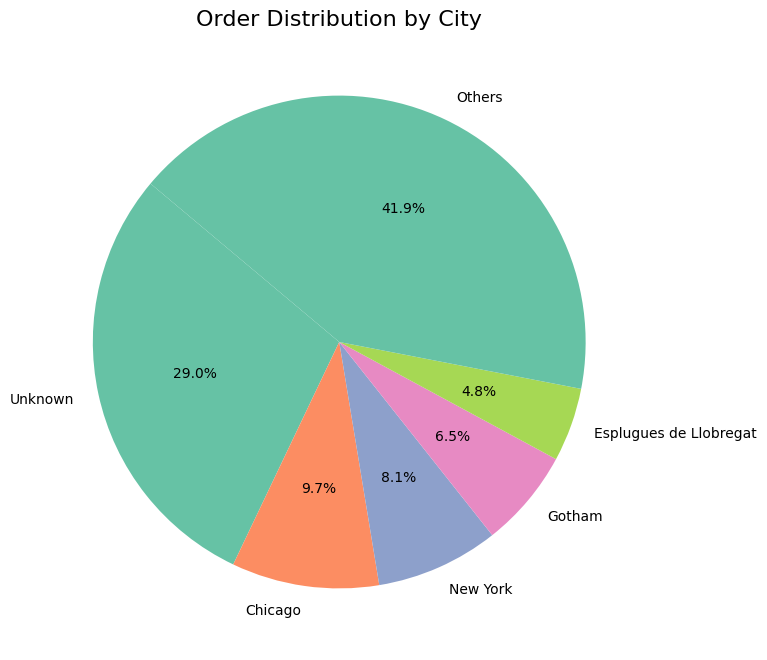

In [12]:
df_2["city"] = df_2["contact_address"].apply(lambda x: x.split(",")[0].strip())

city_counts = df_2["city"].value_counts().head(5)
others_count = df_2["city"].value_counts()[5:].sum()

city_counts["Others"] = others_count

plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'])
plt.title("Order Distribution by City", fontsize=16)
plt.show()